#**Analisis Penjualan**

##**Pengumpulan Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Impor pustaka yang diperlukan**

In [ ]:
import os
import pandas as pd

###**Gabungkan data dari setiap bulan ke dalam satu CSV**

In [ ]:
directory = "/content/drive/MyDrive/Qarirlab/datasales"
files = [file for file in os.listdir(directory) if file.endswith('.csv')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(os.path.join(directory, file))
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("/content/data_12.csv", index=False)

###**Membaca dataframe yang diperbarui**

In [ ]:
databaru = pd.read_csv("data_12.csv")
databaru.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##**Pemeriksaan Awal Data**


###**Periksa jumlah baris dan kolom**

In [ ]:
jumlah_baris, jumlah_kolom = databaru.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 1494800
Jumlah Kolom: 6


###**Memeriksa tipe data setiap kolom**

In [ ]:
tipe_data = databaru.dtypes
print("\nTipe Data Setiap Kolom:")
print(tipe_data)


Tipe Data Setiap Kolom:
Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


###**Memeriksa apakah ada nilai yang hilang**

In [ ]:
missing_values = databaru.isnull().sum()
print("\nJumlah Nilai yang Hilang per Kolom:")
print(missing_values)



Jumlah Nilai yang Hilang per Kolom:
Order ID            4360
Product             4360
Quantity Ordered    4360
Price Each          4360
Order Date          4360
Purchase Address    4360
dtype: int64


##**Bersihkan Data**

###**Hilangkan NAN**

In [ ]:
nan_df = databaru[databaru.isna().any(axis=1)]
display(nan_df.head())

databaru = databaru.dropna(how='all')
databaru.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


###**Menghilangkan teks di kolom tanggal pesanan**

In [ ]:
databaru = databaru[databaru['Order Date'].str[0:2]!='Or']

###**Membuat kolom dengan tipe yang benar**

In [ ]:
databaru['Quantity Ordered'] = pd.to_numeric(databaru['Quantity Ordered']) # make int
databaru['Price Each']= pd.to_numeric(databaru['Price Each']) # make float

##**Tambahkan data dengan kolom tambahan**

###**Tambah kolom bulan**

In [ ]:
databaru['Month'] = databaru['Order Date'].str[0:2]
databaru['Month'] = databaru['Month'].astype('int32')
databaru.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


###**Tambah kolom penjualan**

In [ ]:
databaru['Sales'] = databaru['Quantity Ordered'] * databaru['Price Each']
databaru.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


###**Tambah kolom kota**

In [ ]:
def get_city(address):
    parts = address.split(',')
    if len(parts) >= 2:
        return parts[1].strip()
    else:
        return ''

def get_state(address):
    parts = address.split(',')
    if len(parts) >= 3:
        state_part = parts[2].split()
        if len(state_part) >= 2:
            return state_part[1].strip()
    return ''

databaru['City'] = databaru['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
databaru.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (10001)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (10001)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (10001)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (94016)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (30301)


##**Statistik Deskriptif**

Hitung statistik deskriptif untuk kolom-kolom yang relevan, Ini meliputi statistik seperti rata-rata, median, dan deviasi standar.


In [ ]:
deskripsi = databaru[['Quantity Ordered', 'Sales']].describe()

print("Statistik Deskriptif untuk Kolom-kolom yang Relevan:")
print(deskripsi)

Statistik Deskriptif untuk Kolom-kolom yang Relevan:
       Quantity Ordered         Sales
count      1.487600e+06  1.487600e+06
mean       1.124383e+00  1.854909e+02
std        4.427916e-01  3.329190e+02
min        1.000000e+00  2.990000e+00
25%        1.000000e+00  1.195000e+01
50%        1.000000e+00  1.495000e+01
75%        1.000000e+00  1.500000e+02
max        9.000000e+00  3.400000e+03


##**Visualisasi Data**

###**Grafik untuk tren penjualan bulanan**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
results = databaru.groupby('Month').sum()

<ipython-input-159-51cfb7f64f0c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = databaru.groupby('Month').sum()


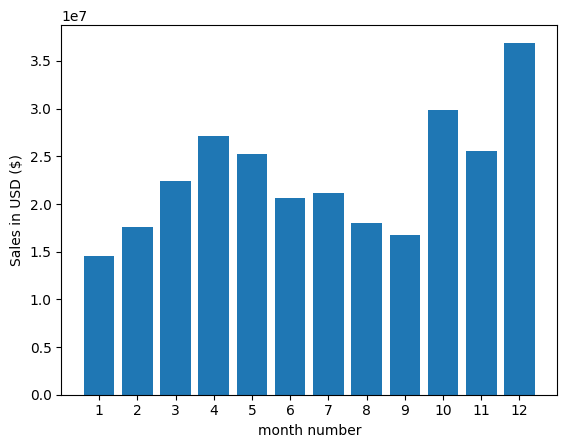

In [ ]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('month number')
plt.ylabel('Sales in USD ($)')
plt.show()

###**Membuat grafik garis untuk tren penjualan harian**

In [ ]:
databaru['Order Date'] = pd.to_datetime(databaru['Order Date'])

In [ ]:
databaru['Day'] = databaru['Order Date'].dt.date
databaru['Hour'] = databaru['Order Date'].dt.hour
databaru['Minute'] = databaru['Order Date'].dt.minute

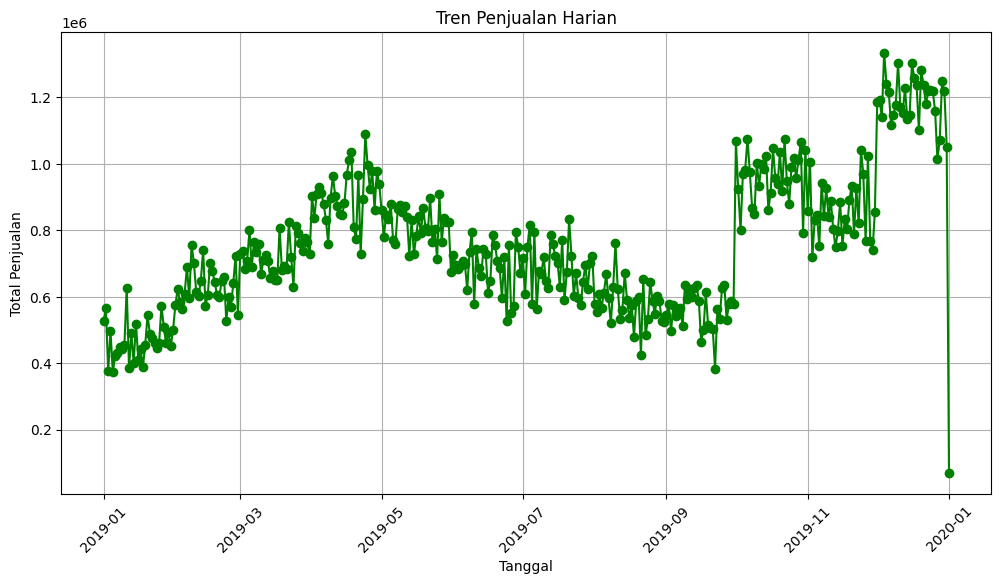

In [ ]:
daily_sales = databaru.groupby(databaru['Order Date'].dt.date)['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='green', linestyle='-')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

###**Grafik Tren Penjualan Kota**

In [ ]:
results = databaru.groupby('City').sum()
results

<ipython-input-164-2d40d689e57a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = databaru.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (30301),132816,22239265.60,838352,22363988.64,1714112,3543456
Austin (73301),89224,14478988.88,558632,14556654.00,1135568,2312480
Boston (02215),180224,29099278.16,1128896,29293136.08,2305800,4723536
Dallas (75001),133840,22021022.56,836960,22143803.20,1715120,3481240
Los Angeles (90001),266312,43371481.84,1666600,43620566.40,3419552,6933104
New York City (10001),223456,37082966.64,1405928,37314539.44,2861568,5868784
Portland (04101),22000,3577514.00,137152,3598066.16,281688,582848
Portland (97035),90424,14884465.76,564968,14965858.72,1155368,2364264
San Francisco (94016),401912,65691693.92,2524160,66097631.28,5146120,10555816


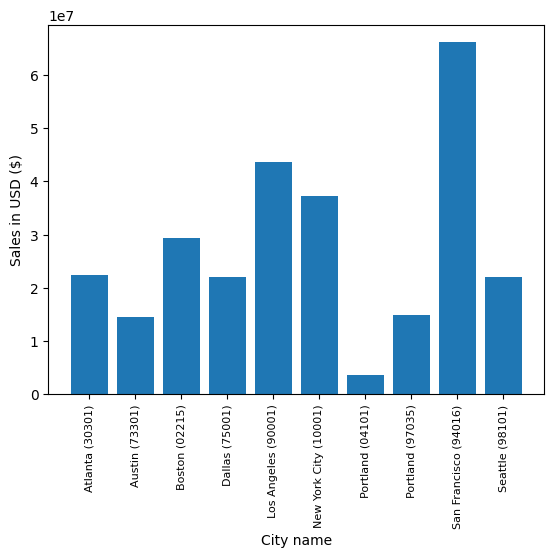

In [ ]:
cities = [city for city, df in databaru.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City name')
plt.ylabel('Sales in USD ($)')
plt.show()

###**Membuat grafik garis untuk tren penjualan Jam**

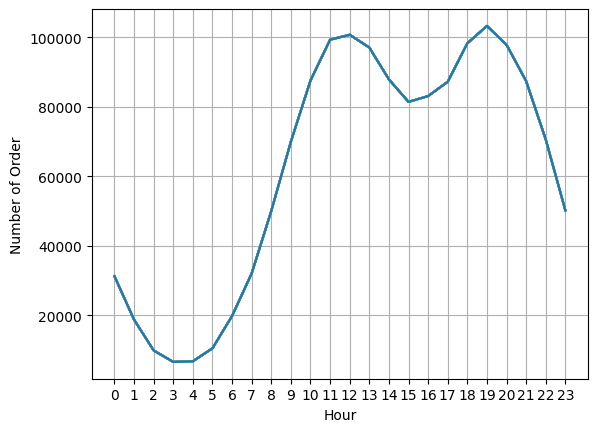

In [ ]:
hours = [hour for hour, df in databaru.groupby('Hour')]

plt.plot(hours, databaru.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Order')
plt.grid()
plt.show()

###**Grafik bar untuk kategori produk**

<ipython-input-167-215ee13ca3bf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


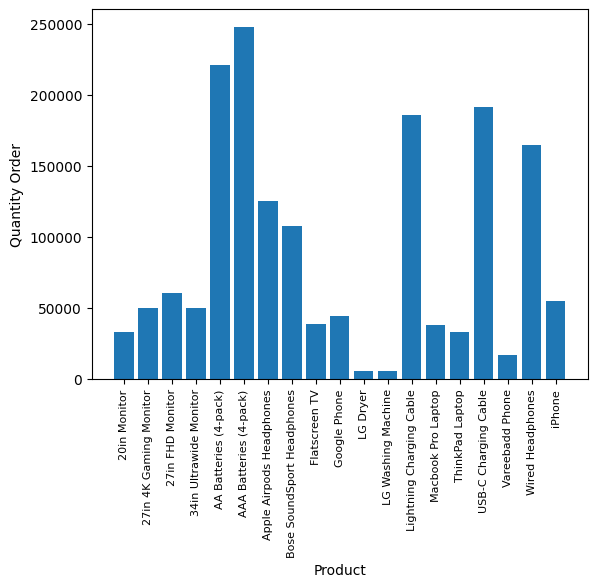

In [ ]:
product_group = databaru.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Order')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

##**Analisis Pelanggan**

###**Menghitung rata-rata penjualan harian bulanan**

In [ ]:
monthly_avg_sales = databaru.groupby(databaru['Order Date'].dt.to_period('M'))['Sales'].mean()

###**Membuat grafik garis untuk menunjukkan tren bulanan**

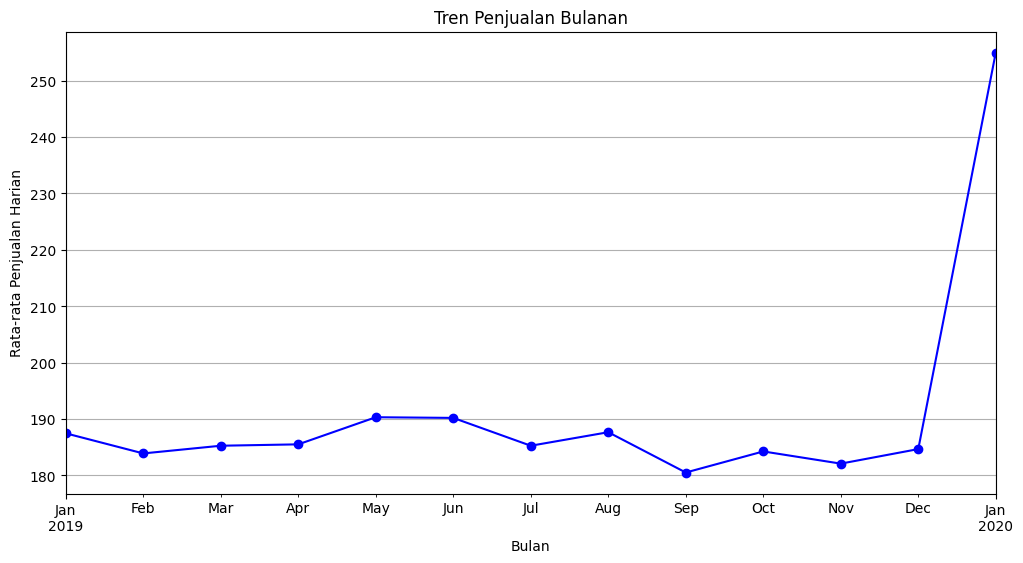

In [ ]:
plt.figure(figsize=(12, 6))
monthly_avg_sales.plot(kind='line', marker='o', color='blue')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penjualan Harian')
plt.grid()
plt.show()

###**Segmentasi pelanggan berdasarkan preferensi produk**

In [ ]:
customer_sales = databaru.groupby('Order ID')['Sales'].sum()

###**Perbandingan penjualan antara pelanggan**

In [ ]:
from sklearn.cluster import KMeans

product_preferences = pd.get_dummies(databaru['Product'])

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(product_preferences)

databaru['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
top_customers = customer_sales.nlargest(10)
print("Top 10 Pelanggan dengan Total Penjualan Tertinggi:")
print(top_customers)

Top 10 Pelanggan dengan Total Penjualan Tertinggi:
Order ID
181069    30239.92
181544    27200.00
200528    27200.00
202212    27200.00
210292    27200.00
243728    27200.00
255318    27200.00
177182    21599.92
188087    21599.92
189207    21599.92
Name: Sales, dtype: float64


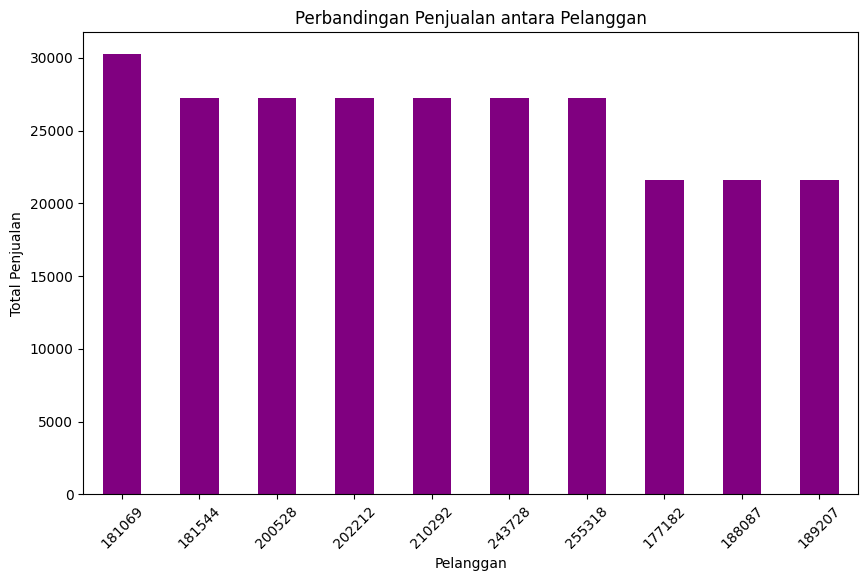

In [ ]:
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='purple')
plt.title('Perbandingan Penjualan antara Pelanggan')
plt.xlabel('Pelanggan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

###**Histogram Harga Produk**

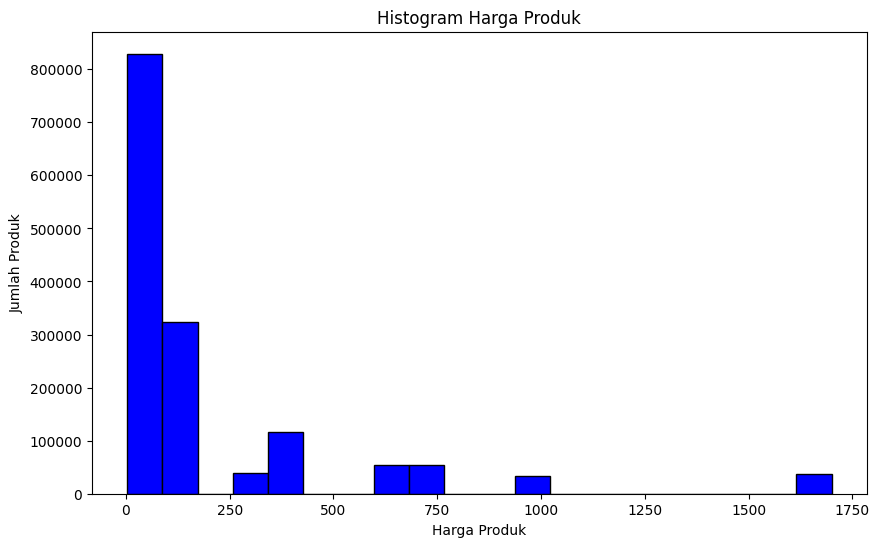

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(databaru['Price Each'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram Harga Produk')
plt.xlabel('Harga Produk')
plt.ylabel('Jumlah Produk')
plt.show()

###**Diagram sebaran jumlah produk yang terjual vs harga**

<ipython-input-175-1cb573b5df87>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = databaru.groupby('Product').mean()['Price Each']
<ipython-input-175-1cb573b5df87>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, prices, 'b-', color='r')
<ipython-input-175-1cb573b5df87>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


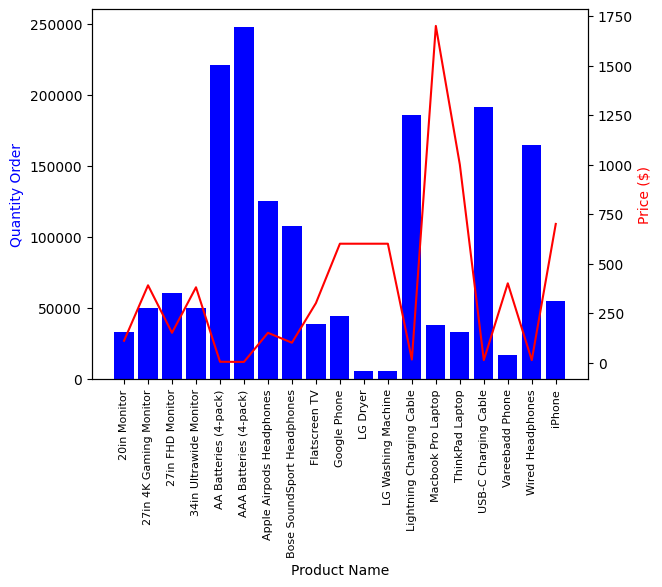

In [ ]:
prices = databaru.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='b')
ax2.plot(products, prices, 'b-', color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Order', color='b')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

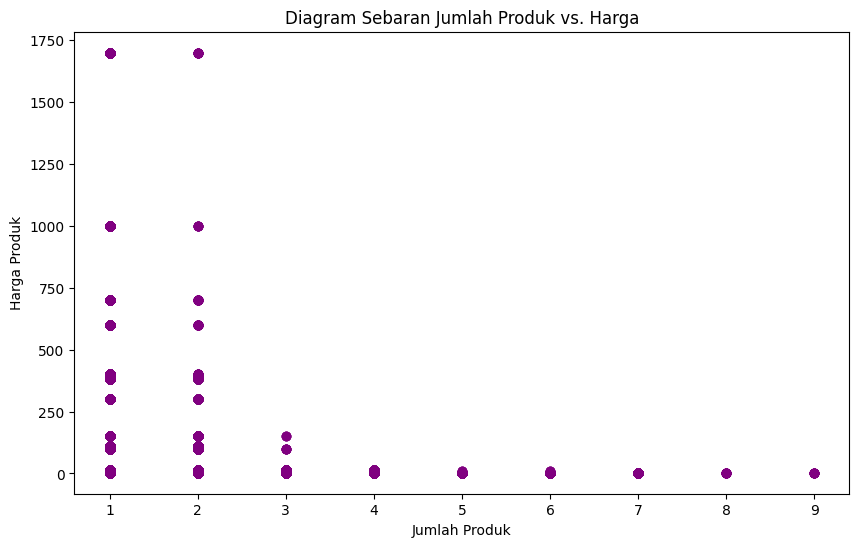

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(databaru['Quantity Ordered'], databaru['Price Each'], color='purple', alpha=0.5)
plt.title('Diagram Sebaran Jumlah Produk vs. Harga')
plt.xlabel('Jumlah Produk')
plt.ylabel('Harga Produk')
plt.show()

#**Kesimpulan**

##**berdasarkan Waktu**

**1. Penjualan berdasarkan Jam:**

Grafik tren penjualan berdasarkan jam menunjukkan bahwa penjualan cenderung meningkat selama siang hari (sekitar pukul 11:00 hingga 19:00). Ini bisa memberikan wawasan tentang waktu terbaik untuk menargetkan pelanggan atau mengatur promosi.

**2. Tren Penjualan Harian:**

Tren penjualan harian menunjukkan fluktuasi harian yang wajar, tetapi ada beberapa hari dengan penjualan yang cukup tinggi. Ini bisa menjadi titik awal untuk menganalisis faktor-faktor yang memengaruhi penjualan pada hari-hari tertentu.

**3. Penjualan Bulanan:**

Grafik batang bulanan menunjukkan bahwa penjualan mencapai puncak tertinggi pada bulan Desember, dan penjualan relatif rendah pada bulan Januari dan Februari. Ini mungkin karena peningkatan penjualan selama musim liburan.

##**Berdasarkan Lokasi**

**Penjualan berdasarkan Kota:**

Grafik batang penjualan berdasarkan kota menunjukkan bahwa kota tertentu memiliki kontribusi penjualan yang lebih besar daripada yang lain. Ini bisa menjadi informasi yang berguna untuk mengoptimalkan strategi penjualan di berbagai lokasi.

##**Berdasarkan Produk dan Pelanggan**

**Penjualan Berdasarkan Produk:**

Grafik batang menunjukkan produk tertentu memiliki jumlah pesanan yang lebih tinggi daripada yang lain. Ini bisa menjadi produk-produk unggulan yang perlu mendapatkan perhatian lebih dalam strategi penjualan.

**Top 10 Pelanggan:**

Anda telah mengidentifikasi 10 pelanggan dengan total penjualan tertinggi. Ini dapat digunakan untuk memberikan layanan dan penawaran khusus kepada pelanggan yang berkontribusi paling besar pada penjualan.

##**Berdasarkan Penawaran**

**1. Histogram Harga Produk:**

Histogram harga produk menunjukkan distribusi harga produk. Mayoritas produk memiliki harga di kisaran tertentu, tetapi ada juga beberapa produk dengan harga yang lebih tinggi.

**2. Korelasi antara Harga dan Jumlah Produk yang Terjual:**

Dari diagram sebaran jumlah produk yang terjual vs. harga, tidak ada korelasi yang jelas antara harga produk dan jumlah produk yang terjual. Produk dengan harga tinggi atau rendah dapat memiliki jumlah produk yang terjual yang beragam.

**3. Produk Terpopuler Berdasarkan Jumlah Pesanan:**

Produk tertentu, seperti "Macbook Pro Laptop" dan "iPhone" memiliki jumlah pesanan yang lebih tinggi dibandingkan produk lain. Ini bisa menjadi produk-produk unggulan yang perlu mendapatkan perhatian khusus dalam strategi penjualan.

**4. Harga Produk vs. Jumlah Pesanan:**

Grafik batang menunjukkan perbandingan antara jumlah pesanan dan harga produk. Beberapa produk dengan harga tinggi memiliki jumlah pesanan yang cukup tinggi, menunjukkan bahwa pelanggan bersedia membayar harga yang lebih tinggi untuk produk-produk tersebut.

###**insight**

Pola dan tren ini dapat memberikan wawasan yang berguna untuk mengambil keputusan bisnis, seperti:
*   Mengidentifikasi produk-produk yang perlu ditingkatkan promosinya.
*   Menentukan waktu terbaik untuk melakukan promosi atau penawaran khusus.
*   Mengelola hubungan dengan pelanggan yang paling berkontribusi pada penjualan.
*   Mengelola stok produk yang paling populer dan mengidentifikasi produk yang memerlukan penyesuaian harga.
*   Memahami bagaimana harga produk memengaruhi penjualan.
*   Menentukan produk yang mungkin memerlukan strategi pemasaran khusus.






